In [34]:
import pandas as pd
import matplotlib.pylab as plt


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [10]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SaskPolytech-AIDA-2425/Fall-Semester/COMP603/In_Class_Assign/ml-32m/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
tags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SaskPolytech-AIDA-2425/Fall-Semester/COMP603/In_Class_Assign/ml-32m/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


In [12]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SaskPolytech-AIDA-2425/Fall-Semester/COMP603/In_Class_Assign/ml-32m/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

<ipython-input-12-8c2462a9c7ec>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SaskPolytech-AIDA-2425/Fall-Semester/COMP603/In_Class_Assign/ml-32m/ratings.csv', sep=',', parse_dates=['timestamp'])


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [13]:
del ratings['timestamp']
del tags['timestamp']

In [14]:
row_0 = tags.iloc[0]
print(type(row_0))
print(row_0)

<class 'pandas.core.series.Series'>
userId              22
movieId          26479
tag        Kevin Kline
Name: 0, dtype: object


In [15]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [16]:
row_0['userId']

22

In [17]:
'rating' in row_0

False

In [18]:
row_0.name

0

In [19]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [20]:
ratings.describe()

,userId,movieId,rating
count,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00
std,5.794905e+04,5.095816e+04,1.058986e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,5.005300e+04,1.233000e+03,3.000000e+00
50%,1.002970e+05,3.452000e+03,3.500000e+00
75%,1.504510e+05,4.419900e+04,4.000000e+00
max,2.009480e+05,2.927570e+05,5.000000e+00


In [21]:
ratings.mode()

,userId,movieId,rating
0,175325,318,4.0


In [22]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.000420,0.001956
movieId,0.000420,1.000000,-0.018376
rating,0.001956,-0.018376,1.000000


In [23]:
filter_2 = ratings.loc[ratings['rating'] > 0]

In [24]:
filter_2.groupby("movieId").mean()

,userId,rating
movieId,,
1,100369.803006,3.897438
2,100970.315423,3.275758
3,100388.785747,3.139447
4,97944.691732,2.845331
5,100427.174700,3.059602
...,...,...
292731,50685.000000,4.000000
292737,165364.000000,1.500000
292753,150812.000000,4.000000


In [25]:
movies.shape

(87585, 3)

In [26]:
movies.isnull().any()

,0
movieId,False
title,False
genres,False


In [27]:
ratings.shape

(32000204, 3)

In [28]:
ratings.isnull().any()

,0
userId,False
movieId,False
rating,False


In [29]:
tags.shape

(2000072, 3)

In [30]:
tags.isnull().any()

,0
userId,False
movieId,False
tag,True


In [31]:
tags = tags.dropna()

In [32]:
tags.isnull().any()

,0
userId,False
movieId,False
tag,False


In [33]:
tags.shape

(2000055, 3)

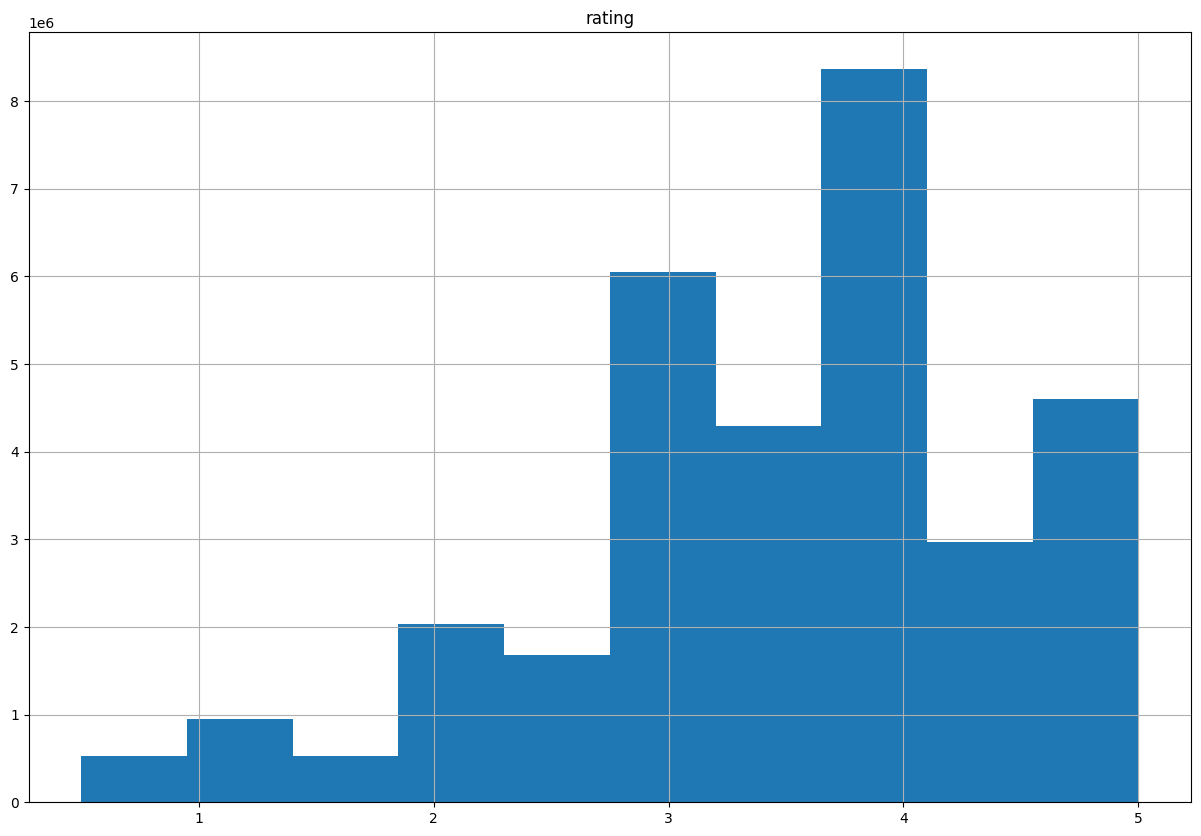

In [35]:
ratings.hist(column='rating', figsize=(15,10),bins=10)
plt.show()

In [36]:
tags['tag'].head()

,tag
0,Kevin Kline
1,misogyny
2,acrophobia
3,music
4,weird


In [37]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [38]:
ratings[-10:]

,userId,movieId,rating
32000194,200948,72011,4.5
32000195,200948,72998,5.0
32000196,200948,74458,4.5
32000197,200948,76093,5.0
32000198,200948,78469,3.0
32000199,200948,79702,4.5
32000200,200948,79796,1.0
32000201,200948,80350,0.5
32000202,200948,80463,3.5
32000203,200948,87304,4.5


In [39]:
ratings.tail(10)

,userId,movieId,rating
32000194,200948,72011,4.5
32000195,200948,72998,5.0
32000196,200948,74458,4.5
32000197,200948,76093,5.0
32000198,200948,78469,3.0
32000199,200948,79702,4.5
32000200,200948,79796,1.0
32000201,200948,80350,0.5
32000202,200948,80463,3.5
32000203,200948,87304,4.5


<Axes: xlabel='tag'>

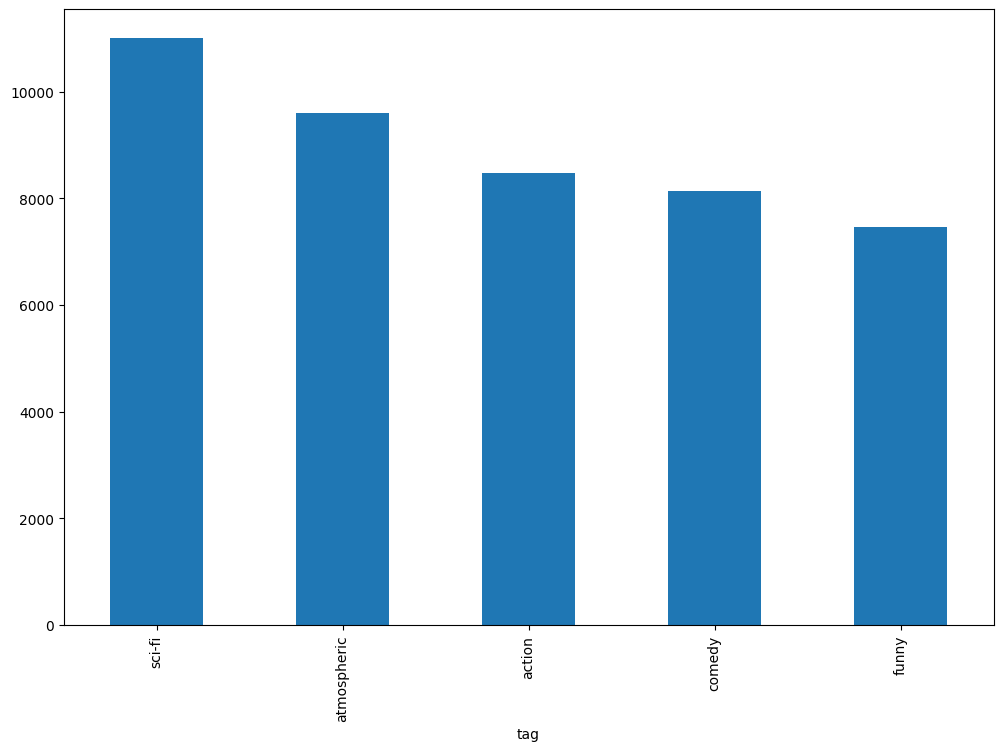

In [40]:
tag_counts = tags['tag'].value_counts()
tag_counts.head().plot(kind='bar', figsize=(12,8))

<Axes: xlabel='tag'>

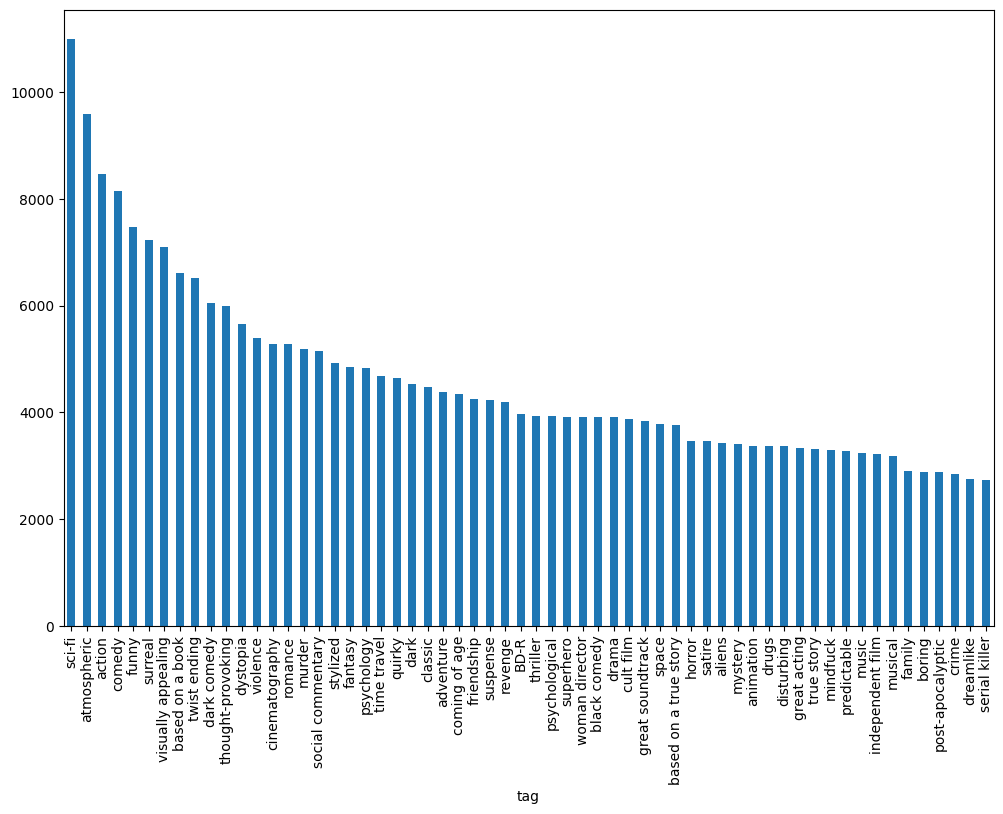

In [41]:
tag_counts.head(60).plot(kind='bar', figsize=(12,8))

<Axes: xlabel='tag'>

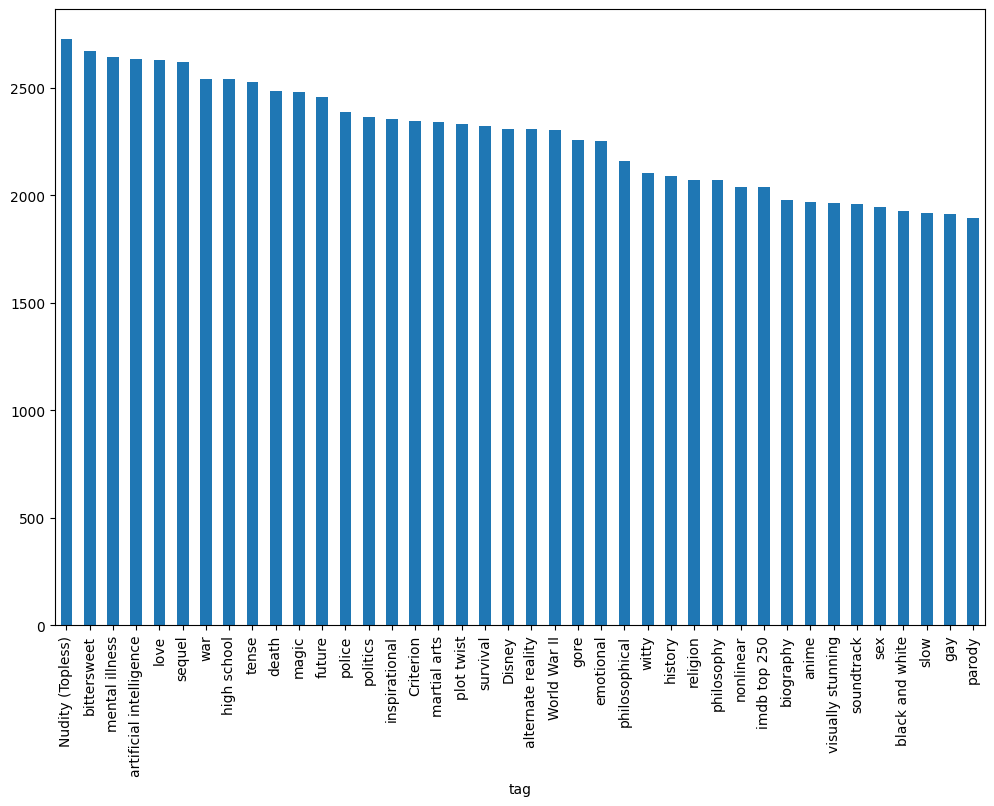

In [42]:
tag_counts[60:100].plot(kind='bar', figsize=(12,8))

In [43]:
is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated].head()

,userId,movieId,rating
0,1,17,4.0
3,1,30,5.0
4,1,32,5.0
7,1,80,5.0
9,1,111,5.0


In [44]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [45]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,525132
1.0,946675
1.5,531063
2.0,2028622
2.5,1685386
3.0,6054990
3.5,4290105
4.0,8367654
4.5,2974000


In [46]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean() # We are not interested in the user that voted for it
average_rating.head()

,rating
movieId,
1,3.897438
2,3.275758
3,3.139447
4,2.845331
5,3.059602


In [47]:
sorted_average_rating=average_rating.sort_values(by="rating",ascending=False)
sorted_average_rating.head()

,rating
movieId,
199103,5.0
268476,5.0
171849,5.0
268054,5.0
268090,5.0


In [48]:
average_rating.loc[average_rating.rating==5.0].head()

,rating
movieId,
31945,5.0
83161,5.0
86975,5.0
92783,5.0
99243,5.0


In [49]:
id_movie=average_rating.loc[average_rating.rating==5.0].index

In [50]:
movies.loc[movies.movieId.isin(id_movie)].head()

,movieId,title,genres
9644,31945,Always a Bridesmaid (2000),Documentary
15774,83161,Deadly Delicious (Shuang Shi Ji) (2008),Drama|Mystery
16466,86975,As Seen Through These Eyes (2008),Documentary
17778,92783,Latin Music USA (2009),Documentary|Musical
19046,99243,"Parasites, Les (1999)",Comedy


In [51]:
tags.head()

,userId,movieId,tag
0,22,26479,Kevin Kline
1,22,79592,misogyny
2,22,247150,acrophobia
3,34,2174,music
4,34,2174,weird


In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
t = pd.merge(movies,tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,109,children
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,109,Disney
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,909,animation
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,909,children
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,909,Disney


In [54]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.897438
1,2,3.275758
2,3,3.139447
3,4,2.845331
4,5,3.059602


In [55]:
box_office = pd.merge(movies,avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
84427,292731,The Monroy Affaire (2022),Drama,4.0
84428,292737,Shelter in Solitude (2023),Comedy|Drama,1.5
84429,292753,Orca (2023),Drama,4.0
84430,292755,The Angry Breed (1968),Drama,1.0
84431,292757,Race to the Summit (2023),Action|Adventure|Documentary,3.5


In [56]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated].tail()

,movieId,title,genres,rating
84417,292607,The Invention of the Other (2022),Documentary,4.5
84418,292609,The Wind Blows the Border (2022),Documentary,4.0
84419,292611,Kenya (2022),Documentary,4.0
84427,292731,The Monroy Affaire (2022),Drama,4.0
84429,292753,Orca (2023),Drama,4.0


In [57]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.897438
2,3,Grumpier Old Men (1995),Comedy|Romance,3.139447
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.845331
4,5,Father of the Bride Part II (1995),Comedy,3.059602
6,7,Sabrina (1995),Comedy|Romance,3.363968


In [58]:
box_office[is_comedy & is_highly_rated].head()

,movieId,title,genres,rating
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.010176
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.028991
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.196969
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.052744
600,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.116533
